## Maximum margin classification with support vector machine(SVM)

In SVMs our optimization objective is to maximize the margin. The margin is defined as the distance between the seperating hyperplane and the training examples that are closet to this hyper plane, which are the so-called **support vector**. <br/>

<p align="center">
  <img src="../markdown-images/maximum_margin.png" width="700">
</p>

### Hyperplane

We use hyperplane to seperate the multi-dimesional data. 
Let's first look at the two dimensional case first. The two-dimensioanl linearly sperable data can be seperated by a line. The function of a line is $y = ax + b$. We can rename x with x1 and y with  x2 and we get. <br/>

$ax_1 - x_2 + b = 0$ <br/>

If we define x = $(x_1, x_2)$ and w = $(a, -1)$ we get, <br/>

$w.x + b = 0$ <br/>

This is the equation of a hyperplane.

### Classifer

Once we have the hyperplane, we can then use the hyperplane to make predictions. We define the hypothesis function $h$ as: <br/>

$
h(x_i) = \begin{cases}
  +1 if w.x + b \ge 0 \\
  -1  if w.x + b \le 0
\end{cases}
$
<p align="center">
  <img src="../markdown-images/hyperplanes.png" width="500">
</p>
<br/>
The point above the hyperplane will be classifed as class +1, and the point below the hyperplane will be classifed as class -1.

The points on the plane $H_1$ and $H_2$ are the **support vectors**. The plane $H_0$ is the medain in between, where $w.x_i + b = 0$
 
d+ = the shortest distance to the closet positive point <br/>
d- = the shortest distance to the closet negative point

The goal of SVM algorithm is to find a hyperplane which could seperate the data accurately. There might be many such hyperplanes and we need to find the best one.

The distance between $H_1$ and $H_0$ is then:
$\frac{|w.x + b|}{||w||} = \frac{1}{||w||}$
<br/>
The total distance between $H_1$ and $H_2$ is thus : $\frac{2}{||w||}$ <br/>

In order to maximize the margin, we thus need to minimize ||w||.

### Maximum margin intuition

The rationale behind having decison boundaries with large margins is that they tend to have a lower generalization error, whereas models with small margins are more prone to overfitting. 

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.animation as animation

In [3]:
def run_simulation(clf):
    colordict = {0:'#E51E2B', 1:'#9F8889'}
    mdict = {1: 's', 0: 'o'}
    # we create 40 separable points
    X, y = make_blobs(n_samples=40, centers=2, random_state=6,cluster_std=2)

    # fit the model, don't regularize for illustration purposes
    clf.fit(X, y)
    for i in range(len(y)):
        plt.scatter(X[i][0], X[i][1], c=colordict[y[i]], s=150, marker =mdict[y[i]])
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    c = ax.contour(XX, YY, Z, colors='k', alpha=0.5)
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=350,
              linewidth=1, facecolors='none', edgecolors='k')
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    

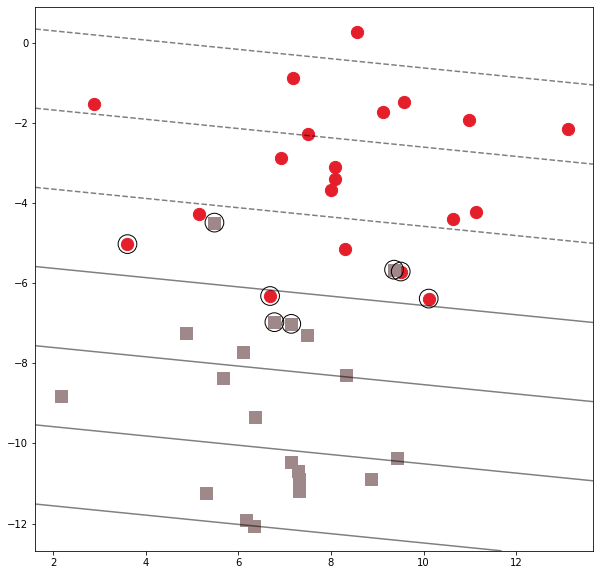

In [4]:
clf = svm.SVC(kernel='linear',C=100)
run_simulation(clf)